# MPAS-Ocean surface flux variables

## Ten-year averages (1947-1956, 1997-2006): All seasons

LR (`60to30E2r2`) and HR (`18to6v3`) CORE-forced 20-21st century simulations (Cycle 1).

***

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import sys
from dateutil.parser import parse

# Import modules from path
sys.path.append('../../modules/')
import visualizationtools as viz

# Set plot font sizes
plt.rcParams.update({'font.size': 10, 'axes.titlesize': 'medium'})

***

## Load results

Define paths, parameters and load aggregated netCDF files. Files were produced using [build_mpas_2Dtimeavgs.py](https://github.com/MPAS-Dev/MPAS-QuickViz/blob/master/ocean/AMOC/watermassanalysis/modules/build_mpas_2Dtimeavgs.py).

In [2]:
# Path, meshes and timeranges
resultspath = '/pscratch/sd/b/bmoorema/results/aggregated/lonlat/'
meshes = ['EC30to60E2r2', 'oRRS18to6v3']
timeranges = [
    ('1947 Jan 1', '1956 Dec 31'),
    ('1997 Jan 1', '2006 Dec 31'),
]
timeranges = [[parse(t) for t in trange] for trange in timeranges]

# Loop though meshes and timeranges
ds = {mesh: {} for mesh in meshes}
for mesh in meshes:
    for timerange in timeranges:
        
        # Construct strings and load 2D fields via xarray
        tstr = '_'.join(date.strftime('%Y%m%d') for date in timerange)
        fn = resultspath + '20210421_sim7_CORE_' + mesh + '.mpas2Dtimeavg_wmtf_' + tstr + '.nc'
        tstr = '-'.join(str(date.year) for date in timerange)
        ds[mesh][tstr] = xr.open_dataset(fn)

***

## Plots

### Water column variables (all seasons)

**Surface temperature**

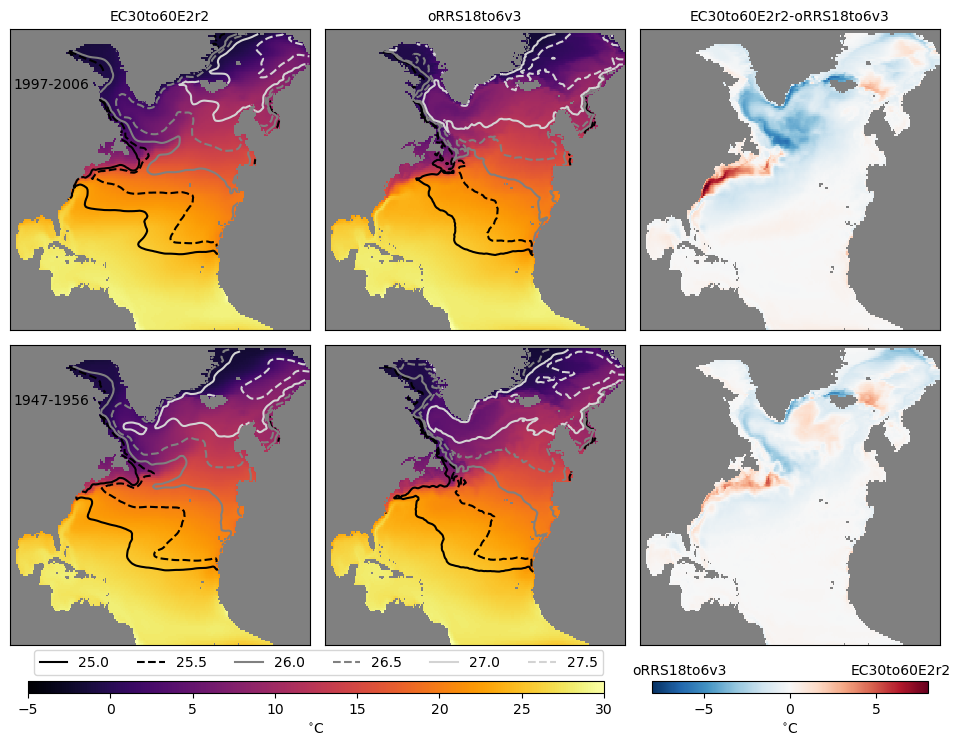

In [3]:
# Plot surface temperature
varname, units, clims = 'temperature', '$^{\circ}$C', [-5, 30, 8]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='inferno')

**Surface salinity**

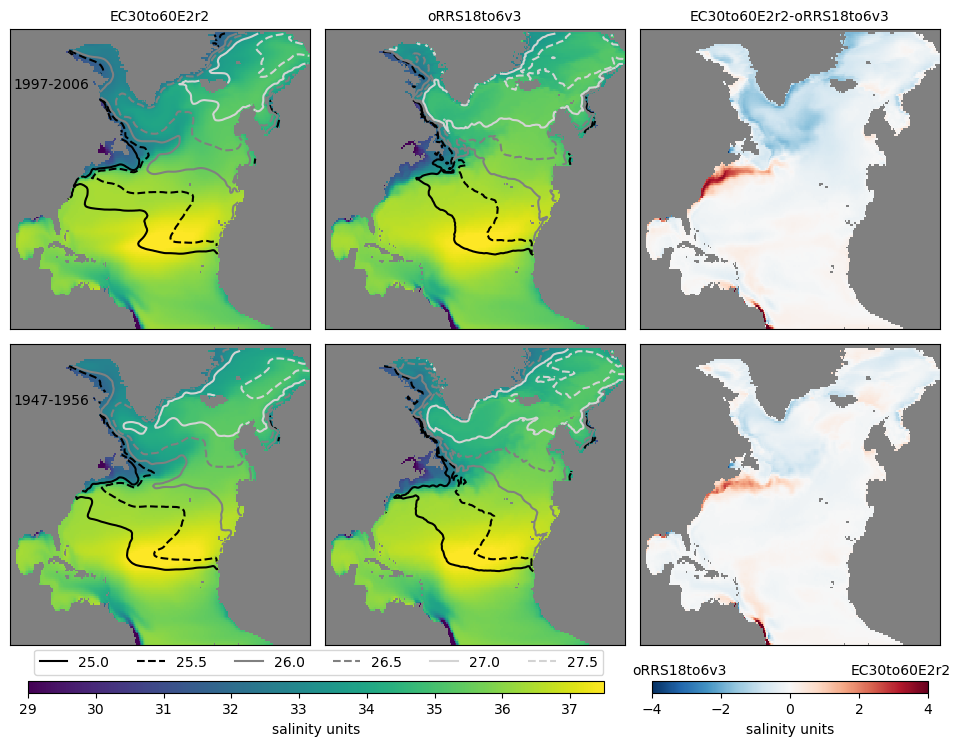

In [5]:
# Plot surface salinity
varname, units, clims = 'salinity', 'salinity units', [29, 37.5, 4]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='viridis')

**Mixed layer depth**

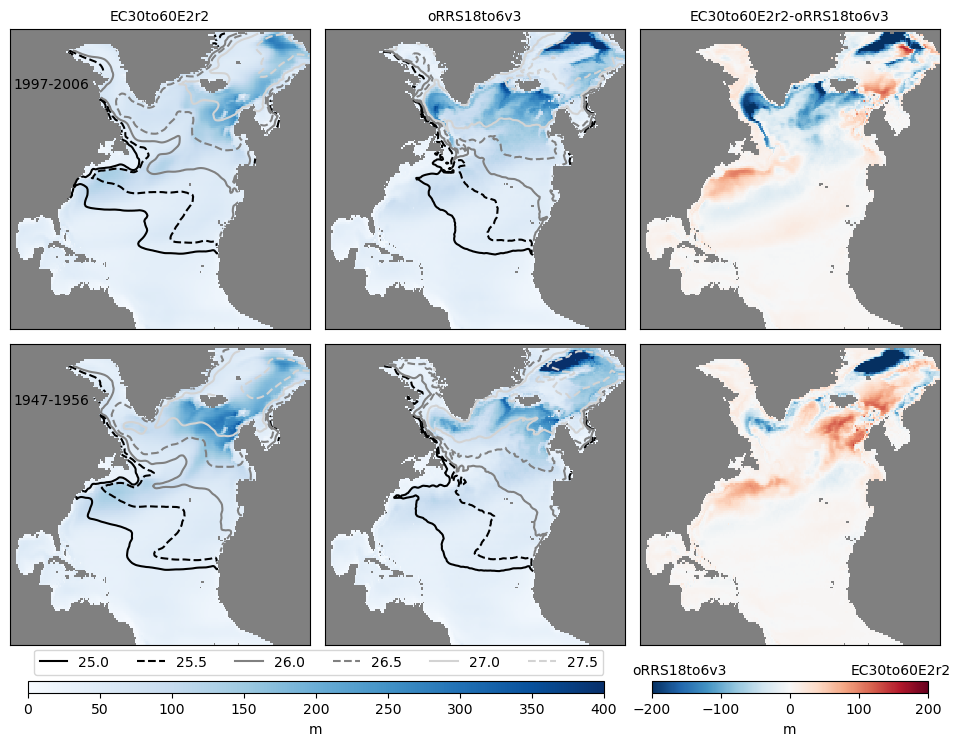

In [5]:
# Plot mixed layer depth
varname, units, clims = 'dThreshMLD', 'm', [0, 400, 200]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='Blues')

***

### Heat fluxes (all seasons)

**Radiative (shortwave + longwave)**

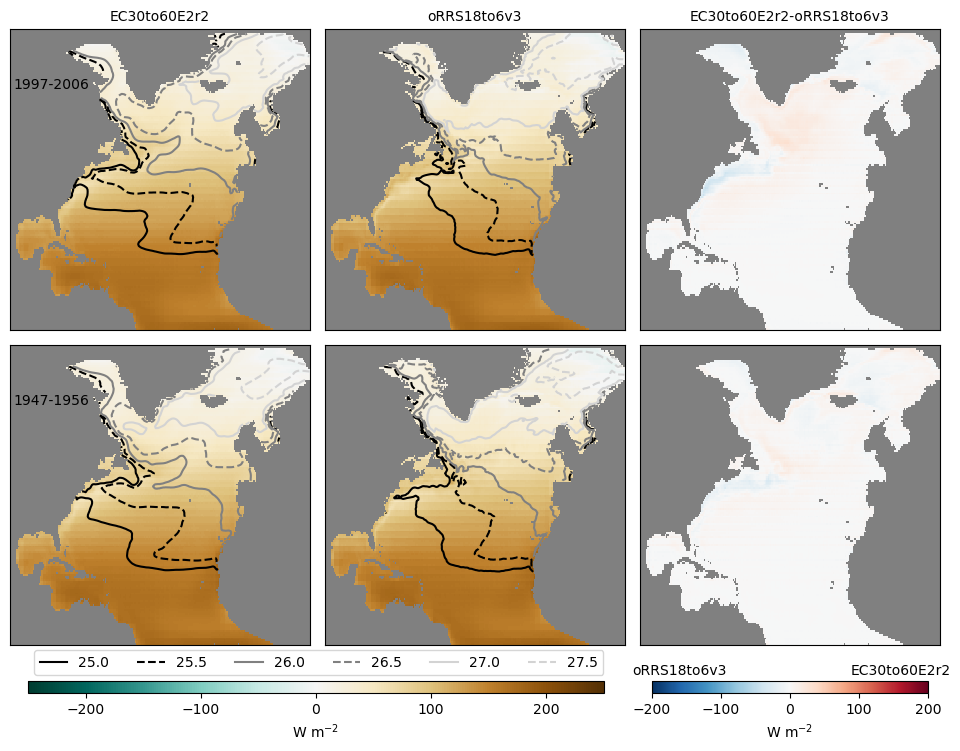

In [6]:
# Plot radiative heat flux
varname, units, clims = 'radiativeFlux', 'W m$^{-2}$', [-250, 250, 200]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='BrBG_r')

**Sensible heat flux**

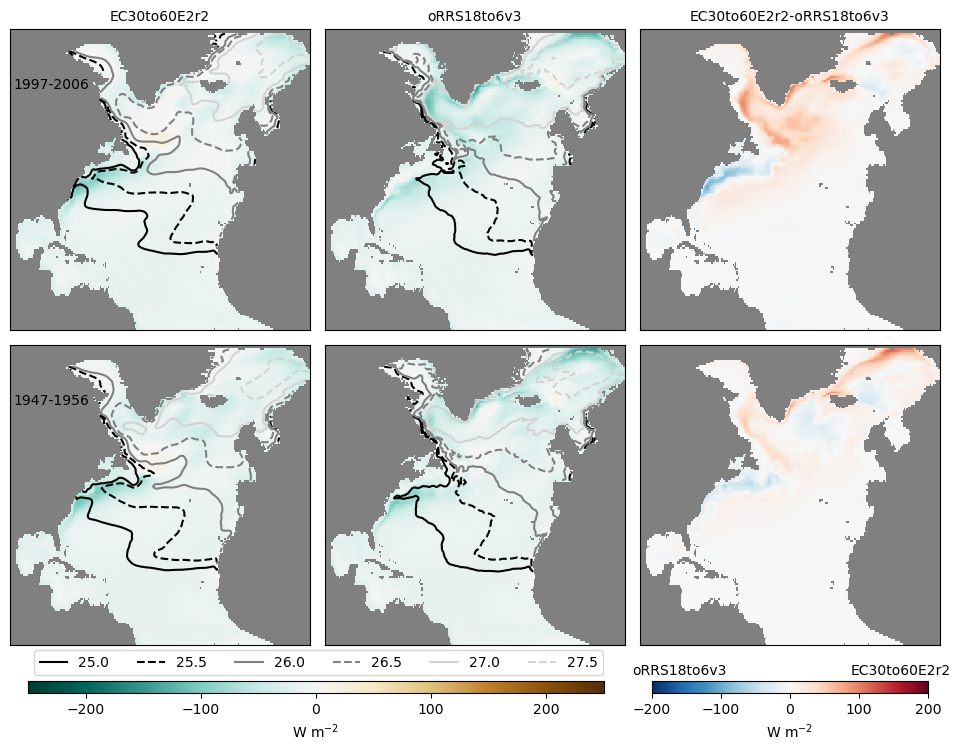

In [7]:
# Plot sensible heat flux
varname, units, clims = 'sensibleHeatFlux', 'W m$^{-2}$', [-250, 250, 200]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='BrBG_r')

**Latent heat flux**

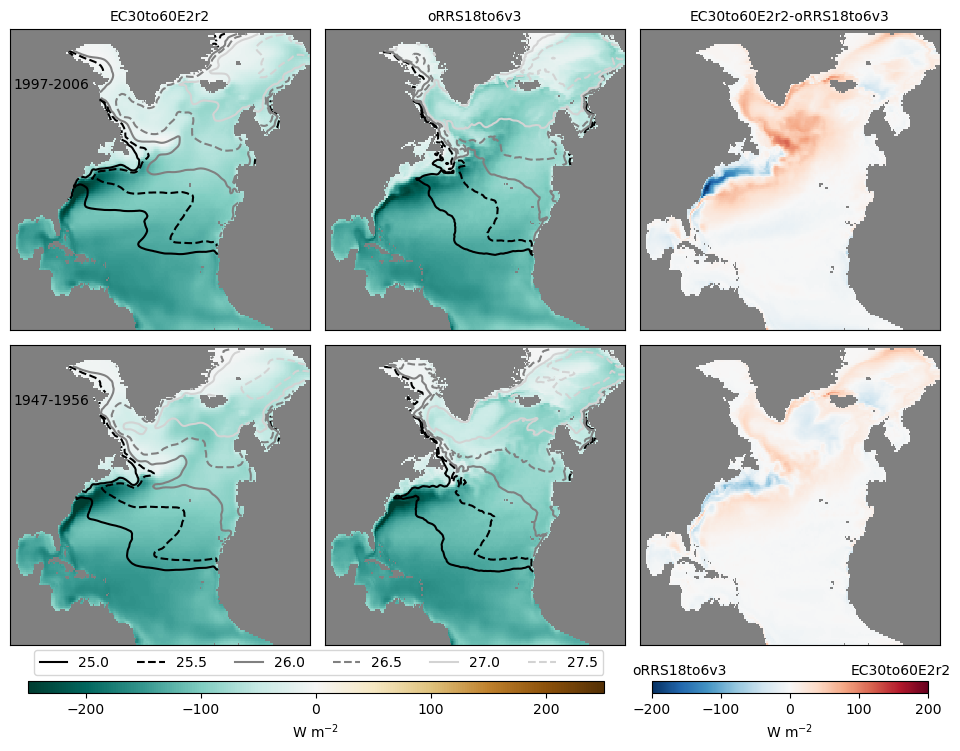

In [8]:
# Plot latent heat flux
varname, units, clims = 'latentHeatFlux', 'W m$^{-2}$', [-250, 250, 200]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='BrBG_r')

**Sea ice heat flux**

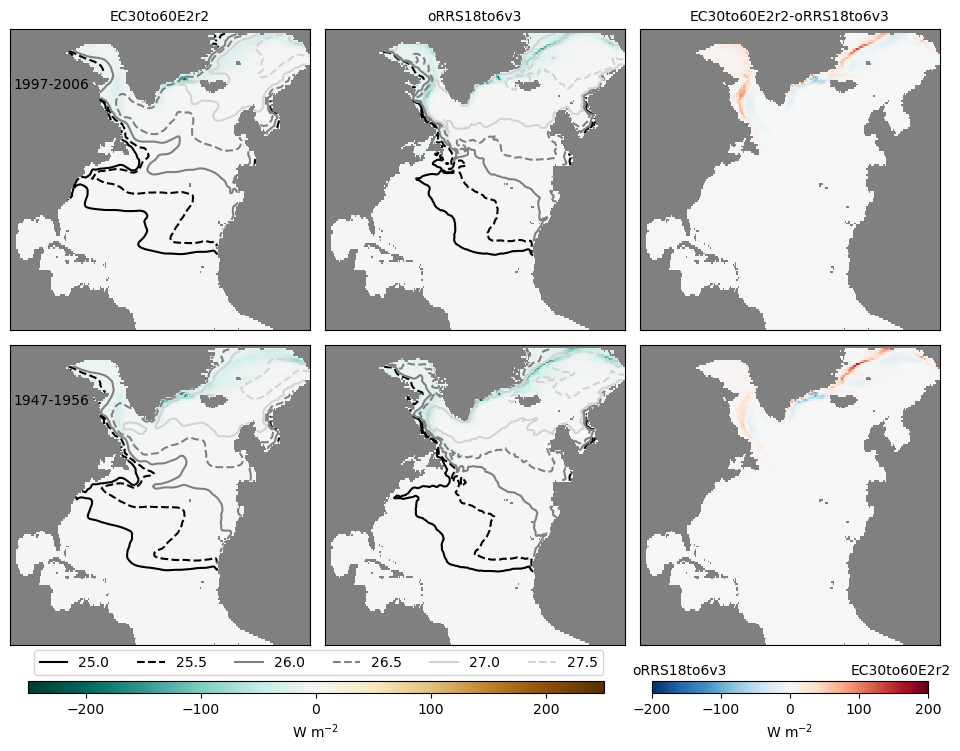

In [9]:
# Plot sea ice heat flux
varname, units, clims = 'seaIceHeatFlux', 'W m$^{-2}$', [-250, 250, 200]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='BrBG_r')

**Total heat flux**

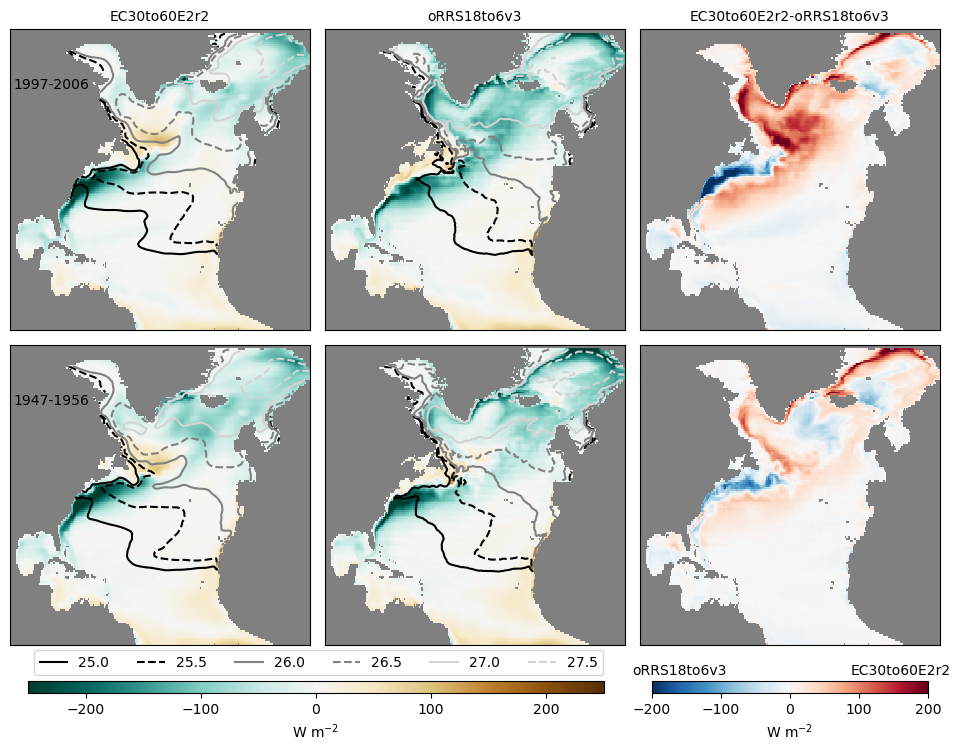

In [10]:
# Plot total heat flux
varname, units, clims = 'totalHeatFlux', 'W m$^{-2}$', [-250, 250, 200]
fig, axs = viz.plot_2Dvariable(ds, varname, units, clims=clims, cmap='BrBG_r')

***

### Freshwater fluxes (all seasons)

**Evaporation flux**

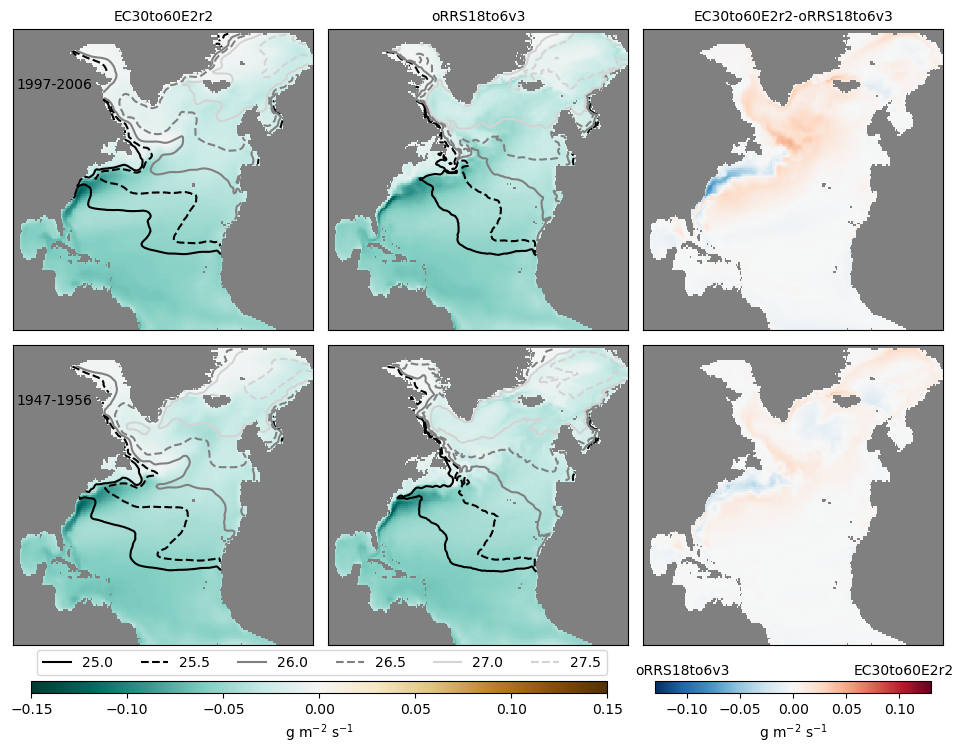

In [11]:
# Plot evaporation flux
varname, units, clims = 'evaporationFlux', 'g m$^{-2}$ s$^{-1}$', [-0.15, 0.15, 0.13]
fig, axs = viz.plot_2Dvariable(ds, varname, units, scale=1e3, clims=clims, cmap='BrBG_r')

**Precipitation flux (rain + snow)**

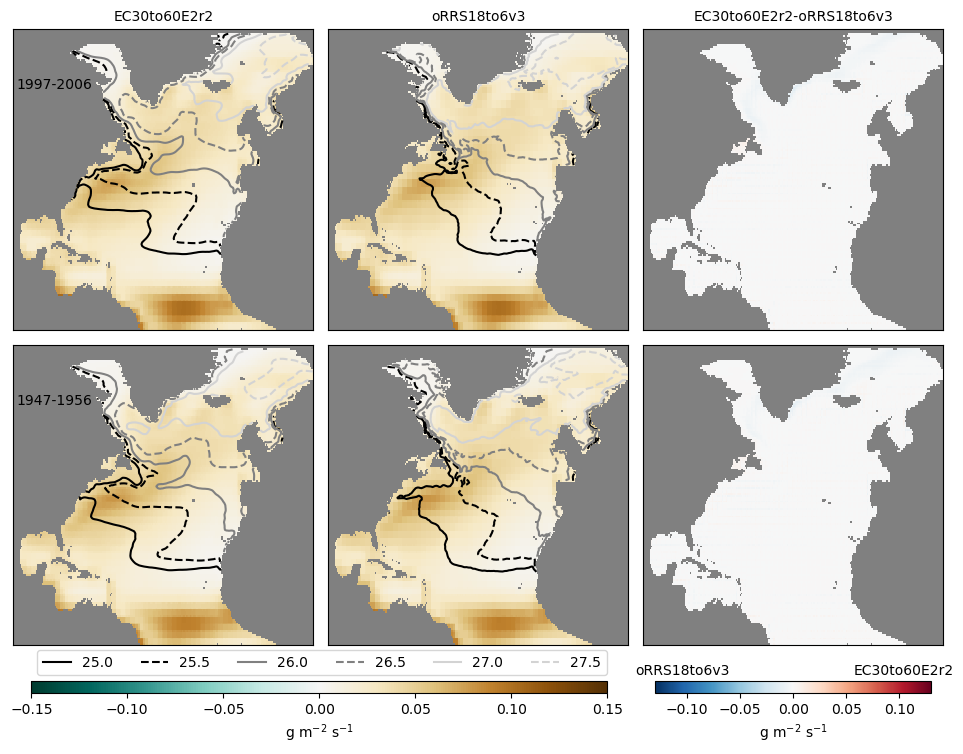

In [12]:
# Plot precipitation flux
varname, units, clims = 'precipitationFlux', 'g m$^{-2}$ s$^{-1}$', [-0.15, 0.15, 0.13]
fig, axs = viz.plot_2Dvariable(ds, varname, units, scale=1e3, clims=clims, cmap='BrBG_r')

**Runoff flux (rivers + ice)**

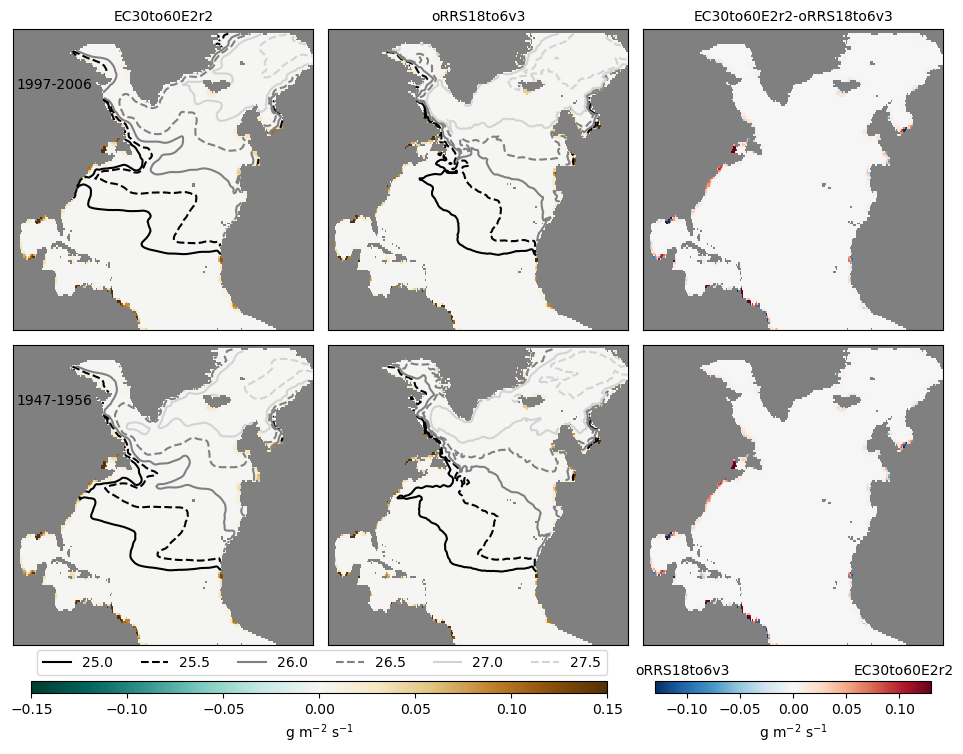

In [13]:
# Plot runoff flux
varname, units, clims = 'runoffFlux', 'g m$^{-2}$ s$^{-1}$', [-0.15, 0.15, 0.13]
fig, axs = viz.plot_2Dvariable(ds, varname, units, scale=1e3, clims=clims, cmap='BrBG_r')

**Sea ice freshwater flux**

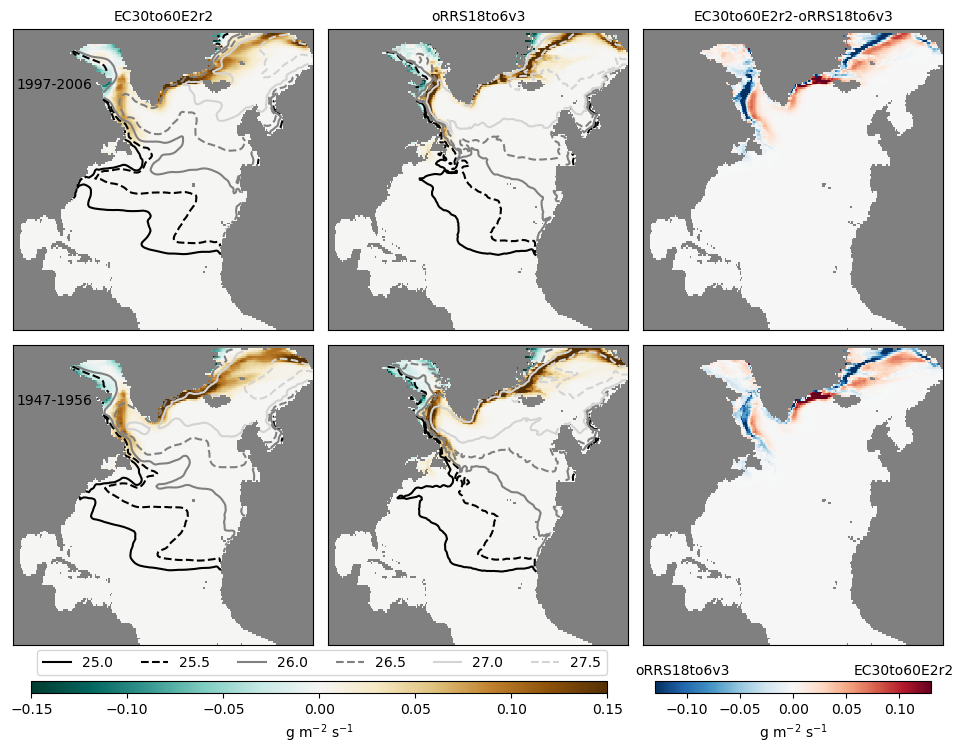

In [14]:
# Plot sea ice freshwater flux
varname, units, clims = 'seaIceFreshWaterFlux', 'g m$^{-2}$ s$^{-1}$', [-0.15, 0.15, 0.13]
fig, axs = viz.plot_2Dvariable(ds, varname, units, scale=1e3, clims=clims, cmap='BrBG_r')

**Total freshwater flux**

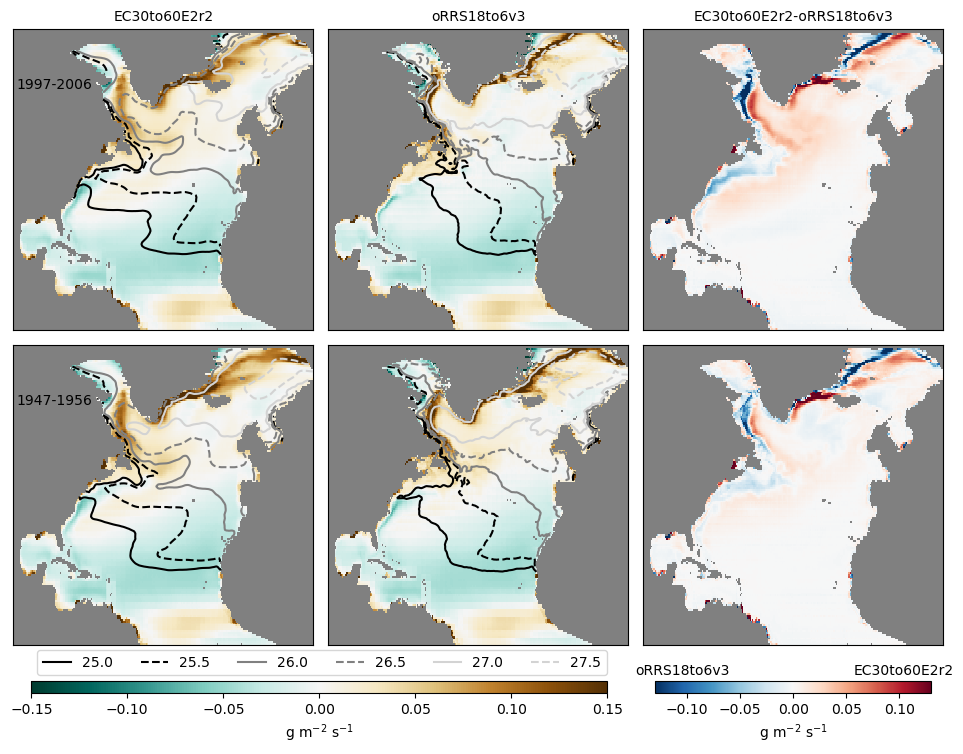

In [15]:
# Plot total freshwater flux
varname, units, clims = 'totalSaltFlux', 'g m$^{-2}$ s$^{-1}$', [-0.15, 0.15, 0.13]
fig, axs = viz.plot_2Dvariable(ds, varname, units, scale=1e3, clims=clims, cmap='BrBG_r')